# Mario Arteche
# Gonzalo Rodríguez

## Machine Learning

## CUNEF



# Exploration and cleaning data analysis

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings("ignore")
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from numpy import genfromtxt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.feature_selection import RFE
from sklearn import model_selection, metrics, linear_model
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot
import pickle
import scikitplot as skplt

import sklearn.metrics as skm

In [2]:
path1 = '../data/Loan_test_set.csv'

In [3]:
df_g = pd.read_csv(path1, skiprows = 1, sep = ',')

df_g.drop(df_g.tail(2).index, inplace = True)

We concatenate all of the data loadings:

We want to check if there are duplicated values in our DataFrame, which contains all the data from the different 4 datasets loaded. To figure it out we will use _duplicated_ function of Python. 

In [4]:
duplicated = df_g[df_g.duplicated(keep = False)]

In [5]:
duplicated

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term


We check that there are no duplicated values in our DataFrame, which is great because we won't have to concern about commiting duplicated errors.

### Droping variables

In [6]:
df_g = df_g.drop(['acc_open_past_24mths', 
                  'dti',
                  'loan_amnt',
                  'total_pymnt',
                  'total_pymnt_inv',
                  'total_rec_int',
                  'total_rec_late_fee',
                  'total_rec_prncp',
                  'total_rev_hi_lim',
                  'chargeoff_within_12_mths',
                  'collection_recovery_fee',
                  'collections_12_mths_ex_med',
                  'debt_settlement_flag',
                  'delinq_2yrs',
                  'earliest_cr_line',
                  'funded_amnt',
                  'funded_amnt_inv',
                  'id',
                  'inq_last_6mths',
                  'installment',
                  'issue_d',
                  'last_credit_pull_d',
                  'last_pymnt_amnt',
                  'last_pymnt_d',
                  'mo_sin_old_rev_tl_op',
                  'mo_sin_rcnt_tl',
                  'mths_since_recent_bc',
                  'mths_since_recent_inq',
                  'num_accts_ever_120_pd',
                  'num_actv_bc_tl',
                  'num_actv_rev_tl',
                  'num_bc_tl',
                  'num_il_tl',
                  'num_op_rev_tl',
                  'num_rev_accts',
                  'num_rev_tl_bal_gt_0',
                  'num_sats',
                  'num_tl_30dpd',
                  'num_tl_90g_dpd_24m',
                  'num_tl_op_past_12m',
                  'open_acc',
                  'out_prncp',
                  'out_prncp_inv',
                  'policy_code',
                  'pub_rec_bankruptcies',
                  'recoveries',
                  'revol_bal',
                  'revol_util',
                  'tax_liens',
                  'term',
                  'total_il_high_credit_limit', 
                  'url'], 
                  axis='columns')

In [7]:
df = df_g

In [8]:
# EN EL ORIGINAL DESPUES DE ESTE PASO SOLO NOS QUEDAMOS CON ESTAS VARIABLES
# Haciendo el paso de abajo solo nos quedamos con las columnas de mas del 70% y asi
#nos evitamos tener probelas
#['int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
#       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
#      'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
#       'fico_range_low', 'fico_range_high', 'pub_rec', 'total_acc',
#       'initial_list_status', 'last_fico_range_high', 'last_fico_range_low',
#       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
#       'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'delinq_amnt',
#      'mo_sin_old_il_acct', 'mo_sin_rcnt_rev_tl_op', 'mort_acc',
#       'num_bc_sats', 'num_tl_120dpd_2m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
#       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
#       'hardship_flag', 'disbursement_method']

In [9]:
df = df[['int_rate',
         'grade', 
         'sub_grade', 
         'emp_title', 
         'emp_length',
        'home_ownership',
         'annual_inc', 
         'verification_status', 
         'loan_status',
          'pymnt_plan',
         'purpose', 
         'title', 
         'zip_code', 
         'addr_state',
       'fico_range_low',
         'fico_range_high',
         'pub_rec',
         'total_acc',
       'initial_list_status', 
         'last_fico_range_high', 
         'last_fico_range_low',
       'application_type',
         'acc_now_delinq', 
         'tot_coll_amt', 
         'tot_cur_bal',
       'avg_cur_bal', 
         'bc_open_to_buy',
         'bc_util',
         'delinq_amnt',
      'mo_sin_old_il_acct', 
         'mo_sin_rcnt_rev_tl_op', 
         'mort_acc',
       'num_bc_sats',
         'num_tl_120dpd_2m',
         'pct_tl_nvr_dlq',
         'percent_bc_gt_75',
       'tot_hi_cred_lim', 
         'total_bal_ex_mort', 
         'total_bc_limit',
       'hardship_flag', 
         'disbursement_method']]

In [10]:
df.shape

(96779, 41)

In [11]:
# eliminamos las variables con mas del 70% de obs con NaN
filtro_Nan = len(df) * .7
df.dropna(thresh = filtro_Nan, axis = 'columns', inplace = True)
df.shape

(96779, 41)

In [12]:
def target(x):
    if x == 'Fully Paid':
        return 1
    elif x == 'Charged Off':
        return 0
    elif x == 'In Grace Period':
        return 0
    elif x == 'Late (31-120 days)':
        return 0
    elif x == 'Late (16-30 days)':
        return 0
    elif x == 'Current':
        return 2
    elif x == 'Default':
        return 0

In [13]:
df['loan_status'] = df.loan_status.map(target)
df.loan_status.unique()

array([2, 1, 0], dtype=int64)

In [14]:
df_impago = df[(df.loan_status == 1) | (df.loan_status == 0)]
df_impago.loan_status.unique()

array([1, 0], dtype=int64)

### Division into numeric and categoric variables

#### Numeric ones

In [15]:
df_n = df_impago.drop(['addr_state',
                       'application_type',
                       'disbursement_method',
                       'emp_length',
                       'loan_status',
                       'emp_title',
                       'grade',
                       'hardship_flag',
                       'home_ownership',
                       'initial_list_status',
                       'purpose',
                       'pymnt_plan',
                       'title',
                       'verification_status',
                       'sub_grade',
                       'zip_code'], axis = 1)

In [16]:
df_n.shape

(18527, 25)

In [17]:
df_n['int_rate'] = df_n.int_rate.str.strip('%').astype(float)

# Check it is correct: 

df_n.int_rate.head(5)

16     7.49
22    10.49
26    11.39
38    25.49
40     7.49
Name: int_rate, dtype: float64

In [18]:
df_c = df_impago.loc[:,['addr_state',
                        'application_type',
                        'disbursement_method',
                        'emp_length',
                        'emp_title',
                        'grade',
                        'hardship_flag',
                        'home_ownership',
                        'initial_list_status',
                        'loan_status',
                        'purpose',
                        'pymnt_plan',
                        'title',
                        'verification_status',
                        'sub_grade',
                        'zip_code']]
# disbursement_method, earliest_cr_line, hardship_flag, initial_list_status, issue_d, last_credit_pull_d, 
# last_pymnt_d, policy_code, title, sub_grade, id, zip_code

In [19]:
# Nos quedamos solo con las categoricas que vamos a incluir en los modelos
df_c.drop(['addr_state',
           'disbursement_method',
           'initial_list_status',
           'title',
           'sub_grade',
           'emp_title',
           'zip_code'], 
            axis = 'columns', 
            inplace = True)

In [20]:
df_c.shape

(18527, 9)

In [21]:
df_c['application_type'] = df_c.application_type.map(lambda x: 0 if ( x == 'Individual')  else 1)

In [22]:
def años(x):
    if (x == '1 year') | (x == '2 years') | (x == '3 years') | (x == '4 years'):
        return 0
    elif (x == '5 year') | (x == '6 years') | (x == '7 years') | (x == '8 years') | (x == '9 years'):
        return 1
    elif x == '10+ years':
        return 2
#MARIO Y GON SOLO EN DOS 

In [23]:
df_c['emp_length'] = df_c.emp_length.map(años)

df_c['emp_length'] = df_c.emp_length.fillna(0)

In [24]:
df_c.emp_length.unique()

array([2., 0., 1.])

In [25]:
def riesgo(x):
    if (x == 'A') | (x == 'B') | (x == 'C'):
        return 0
    elif (x == 'D') | (x == 'E') | (x == 'F') | (x == 'G'):
        return 1

In [26]:
df_c['grade'] = df_c.grade.map(riesgo)

In [27]:
df_c.grade.unique()

array([0, 1], dtype=int64)

In [28]:
df_g.home_ownership.unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE'], dtype=object)

In [29]:
def propiedad(x):
    if (x == 'OWN') | (x == 'MORTGAGE'):
        return 1
    else:
        return 0

In [30]:
df_c['home_ownership'] = df_c.home_ownership.map(propiedad)

In [31]:
df_c.home_ownership.unique()

array([1, 0], dtype=int64)

In [32]:
df_c.purpose.unique()

array(['other', 'major_purchase', 'home_improvement',
       'debt_consolidation', 'car', 'credit_card', 'medical', 'house',
       'moving', 'small_business', 'vacation', 'renewable_energy'],
      dtype=object)

In [33]:
def proposito(x):
    if (x == 'small_business') | (x == 'debt_consolidation') | (x == 'major_purchase' ) | (x == 'medical'):
        return 0
    elif (x == 'credit_card') | (x == 'home_improvement') | (x == 'house') | (x == 'car'):
        return 1
    else:
        return 2

In [34]:
df_c['purpose'] = df_c.purpose.map(proposito)

In [35]:
df_c.purpose.unique()

array([2, 0, 1], dtype=int64)

In [36]:
df_c['pymnt_plan'] = df_c.pymnt_plan.map(lambda x: 0 if (x == 'n') else 1)

In [37]:
df_c.pymnt_plan.unique()

array([0, 1], dtype=int64)

In [38]:
df_c['verification_status'] = df_c.verification_status.map(lambda x: 0 if (x == 'Not Verified') else 1)

In [39]:
df_c.verification_status.unique()

array([0, 1], dtype=int64)

In [40]:
df_c['hardship_flag'] = df_c.hardship_flag.map(lambda x: 0 if (x == 'N') else 1)

In [41]:
df_c['hardship_flag'].unique()

array([0, 1], dtype=int64)

In [42]:
df_c.head(5)

,application_type,emp_length,grade,hardship_flag,home_ownership,loan_status,purpose,pymnt_plan,verification_status
16,0,2.0,0,0,1,1,2,0,0
22,0,0.0,0,0,0,0,0,0,1
26,0,1.0,0,0,1,0,2,0,1
38,0,2.0,1,0,1,1,1,0,1
40,0,2.0,0,0,1,1,0,0,0


We check the info of the categrical variables we have created:

In [43]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18527 entries, 16 to 96772
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   application_type     18527 non-null  int64  
 1   emp_length           18527 non-null  float64
 2   grade                18527 non-null  int64  
 3   hardship_flag        18527 non-null  int64  
 4   home_ownership       18527 non-null  int64  
 5   loan_status          18527 non-null  int64  
 6   purpose              18527 non-null  int64  
 7   pymnt_plan           18527 non-null  int64  
 8   verification_status  18527 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 1.4 MB


In [44]:
df_c = df_c.astype(object)

In [45]:
df_unido = pd.DataFrame(pd.concat([df_n, df_c], axis = 1))

In [46]:
df_unido.shape

(18527, 34)

In [47]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18527 entries, 16 to 96772
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   int_rate               18527 non-null  float64
 1   annual_inc             18527 non-null  float64
 2   fico_range_low         18527 non-null  float64
 3   fico_range_high        18527 non-null  float64
 4   pub_rec                18527 non-null  float64
 5   total_acc              18527 non-null  float64
 6   last_fico_range_high   18527 non-null  float64
 7   last_fico_range_low    18527 non-null  float64
 8   acc_now_delinq         18527 non-null  float64
 9   tot_coll_amt           18527 non-null  float64
 10  tot_cur_bal            18527 non-null  float64
 11  avg_cur_bal            18527 non-null  float64
 12  bc_open_to_buy         18316 non-null  float64
 13  bc_util                18300 non-null  float64
 14  delinq_amnt            18527 non-null  float64
 15  m

In [48]:
X = df_unido.drop('loan_status', axis=1)

y = df_unido['loan_status']
Y = y.astype(int)

In [49]:
pl2 = '../pipelines/tratamiento1.sav'
tratamiento1 = pickle.load(open(pl2, 'rb'))

In [50]:
xgboost = pickle.load(open('../model/xgboost.sav', 'rb'))

In [51]:
xgboost.score(X, Y)

0.8697576509958439

In [52]:
rf = pickle.load(open('../model/random_forest.sav', 'rb'))

In [53]:
rf.score(X, Y)

0.8685701948507584

In [54]:
svm = pickle.load(open('../model/svm.sav', 'rb'))

In [55]:
svm.score(X, Y)

0.5309548226912074

In [56]:
logistic = pickle.load(open('../model/logistic_regresion.sav', 'rb'))

In [57]:
logistic.score(X, Y)

0.8586927187348194

In [58]:
def roc(model, title):
    
    y_pred_prob = model.predict_proba(X)
    
    skplt.metrics.plot_roc(Y, y_pred_prob) # un roc con todas las metricas
    plt.title(f"ROCs curve for {title}.");

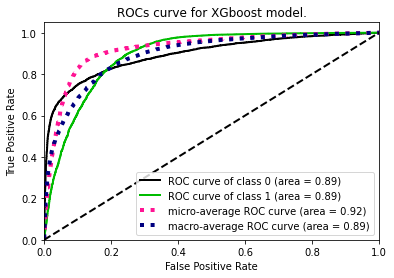

In [59]:
roc(xgboost, 'XGboost model')

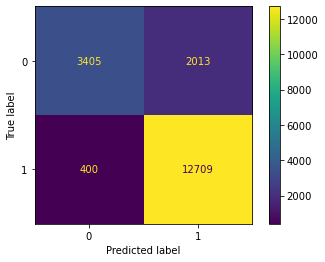

In [60]:
plot_confusion_matrix(xgboost, X=X, y_true=Y);

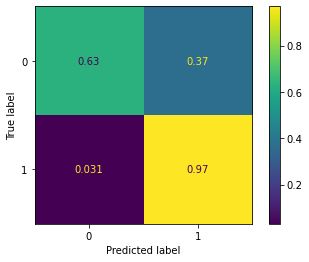

In [61]:
plot_confusion_matrix(xgboost, X=X, y_true=Y, normalize='true');

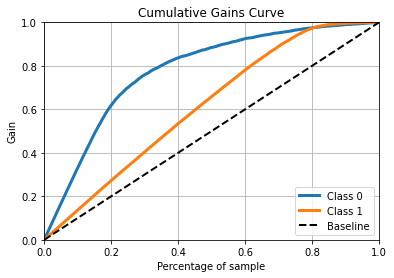

In [62]:
Y_prob = xgboost.predict_proba(X)
skplt.metrics.plot_cumulative_gain(Y, Y_prob);

Xgboost optimized

In [63]:
xgboost_opr = pickle.load(open('../model/xgboost_optimo.sav', 'rb'))

ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.application_type, emp_length, grade, hardship_flag, home_ownership, purpose, pymnt_plan, verification_status

In [ ]:
xgboost_opr.score(X, Y)